In [1]:
from jax_circuits import *
# from exact_decompositions import *
from qiskit import transpile
from qiskit.circuit.library import *
from qiskit.quantum_info import OneQubitEulerDecomposer, random_clifford
from cp_utils import *
from scipy.stats import unitary_group

To do

1. Local minima plots in an accurate way:
    1. For each ansatz several random unitaries and several self-unitaries. 
    1. Separately stats for different realizations of Toffoli 3 and Toffoli 4 gates.

# Local minimums

In [78]:
results_self = []
for i in range(10):
    with open(f'results/local_minimums/3q_random_self_rs{i}', 'rb')  as f:
        results_self.append(pickle.load(f))
        
results_unitary = []
for i in range(10):
    with open(f'results/local_minimums/3q_random_unitary_rs{i}', 'rb')  as f:
        results_unitary.append(pickle.load(f))        

In [79]:
def mean_and_std(results):
    mean_list = []
    std_list = []
    for i in range(len(results[0])):
        sr_list = jnp.array([res[i]['success_ratio'] for res in results])
        mean_list.append(jnp.mean(sr_list))
        std_list.append(jnp.std(sr_list))
    
    return mean_list, std_list        

In [ ]:
anz = Ansatz(2, 'cz', fill_layers(sequ_layer(2)))
anz.learn()

Text(0.5, 1.0, 'Local minimums in 3q circuits')

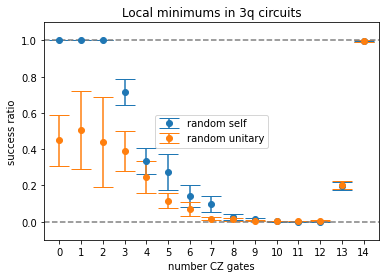

In [102]:
mean_list_self, std_list_self = mean_and_std(results_self)
mean_list_unitary, std_list_unitary = mean_and_std(results_unitary)
plt.errorbar(range(len(mean_list_self)), mean_list_self, yerr=std_list_self, fmt='o', capsize=10, label='random self')
plt.errorbar(range(len(mean_list_unitary)), mean_list_unitary, yerr=std_list_unitary, fmt='o', capsize=10, label='random unitary')
plt.legend()

plt.ylim([-0.1, 1.1])
# plt.yscale('log')
plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=1, color='grey', linestyle='--')
plt.xticks(range(len(mean_list_unitary)))
plt.ylabel('success ratio')
plt.xlabel('number CZ gates')
plt.title('Local minimums in 3q circuits')